# Taller de Manejo y Análisis de Datos

**Profesor**: Pedro Montealegre

# Pandas - Ciencia de datos con Python

Numpy y sus arreglos son nuestra herramienta predilecta para trabajar con datos numéricos que se puedan representar por vectores, matrices (o tensores en más dimensiones).

Cuando se trata de datos experimentales, y en particular cuando queremos extraer conclusiones a partir de la combinación de distintas fuentes de datos, y cuando la información es a menudo incompleta, la librería `pandas` ofrece un gran número de herramientas útiles (y se ha transformado en la herramienta estandar para los cientificos de datos). 

En este capítulo, introduciremos nociones básicas de Pandas. En particular, introduciremos dos tipos de datos clave en Pandas: los objetos `Series` y `DataFrame`.

Por convención, la librería `pandas`se importa bajo el nombre `pd` (del mismo modo que `numpy`se importa bajo el nombre `np`):

In [1]:
import pandas as pd

## Ejemplo motivacional (Series)


Imaginemos que trabajamos en un programa para un supermercado, y queremos llevar la cuenta del número de manzanas (10), naranjas (3) y plátanos (22) que hay en el supermercado. 

Para guardar estos datos, podríamos usar una lista de Python (o un arreglo numpy):

In [3]:
stock = [10, 3, 22]

Sin embargo, tendríamos que almacenar en otra parte que las entradas estan en el order de manzanas, naranjas y plátanos. 
Esto se podría hacer a través de una segunda lista: 

In [4]:
etiquetas = ['manzanas', 'naranjas', 'plátanos']

La solución con dos listas resulta un poco incómoda por dos razones: primero, tendríamos que usar dos listas para un set de datos (y por lo tanto, por ejemplo, tener cuidado con actualizarlas de manera simultánea). Segundo, el acceso a los datos dada una etiqueta es inconveniente: Tendríamos que encontrar el índice de la etiqueta en la lista, y luego usarlo en la otra lista, por ejemplo:

In [5]:
if len(etiquetas) == len(stock) :      # chequeamos que las etiquetas y el stock son consistentes
    for i in range(len(etiquetas)):
            print("%s : %3d" %(etiquetas[i],stock[i]))

manzanas :  10
naranjas :   3
plátanos :  22


Las Series son un objeto de la librería Pandas que ofrece una gran mejora con respecto a la solución de dos listas. Esta estructura de datos nos permite:
* Manterner una sola estructura que tenga las etiquetas y los valores, sin necesidad de verificar que ambas listas tengan el mismo largo. 
* Podemos acceder a objetos individuales a través de la etiqueta. 

Existe una estructura de datos incluida en Python llamada *diccionarios*. Las Series de Pandas son similares a un diccionario, pero con mejoras como:
* El orden de los objetos se preserva por el índice
* Los valores tienen que ser del mismo tipo (lo que permite una mejora en rendimiento) 
* Un gran número de funciones asociadas a Series, que por ejemplo permiten lidiar con datos faltantes, series de tiempo, ordenamiento, graficar, y otros. 

## Las `Series` de Pandas

### Stock example - `Series`

Podemos crear un objeto `Series` a partir, por ejemplo, de dos listas:

In [6]:
stock = pd.Series([10, 3, 22], index=['manzanas', 'naranjas', 'plátanos'])

In [7]:
stock

manzanas    10
naranjas     3
plátanos    22
dtype: int64

Si omitimos el argumento `index`, se asume que los índices son enteros:

In [8]:
stock = pd.Series([10, 3, 22])

In [9]:
stock

0    10
1     3
2    22
dtype: int64

También se puede agregar los índices más tarde:

In [11]:
stock.index = ['manzanas', 'naranjas', 'plátanos']

In [12]:
stock

manzanas    10
naranjas     3
plátanos    22
dtype: int64

In [13]:
stock.index = ['manzanas', 'naranjas', 'uvas']
stock

manzanas    10
naranjas     3
uvas        22
dtype: int64

La presentación por defecto muestra una entrada por línea, con la etiqueta a la izquierda, y el valor a la derecha. 

In [14]:
stock

manzanas    10
naranjas     3
uvas        22
dtype: int64

In [15]:
type(stock)

pandas.core.series.Series

Los índices se pueden recuperar llamando al atributo `index` del objeto `series`:

In [16]:
stock.index

Index(['manzanas', 'naranjas', 'uvas'], dtype='object')

In [17]:
type(stock.index)

pandas.core.indexes.base.Index

También podemos acceder a la lista de valores de cada item, usando el atributo `values`: 

In [18]:
stock.values

array([10,  3, 22])

observar que en realidad la lista de valores son un arreglo numpy:

In [19]:
type(stock.values)

numpy.ndarray

Con respecto al acceso a los datos, el objeto `Series` se comporta como un diccionario:

In [20]:
print(stock)

manzanas    10
naranjas     3
uvas        22
dtype: int64


In [22]:
stock['manzanas']

10

In [23]:
stock["naranjas"]

3

In [24]:
stock['papas'] = 41    # añadiendo valores
stock['pepinos'] = 1

In [25]:
print(stock)

manzanas    10
naranjas     3
uvas        22
papas       41
pepinos      1
dtype: int64


Podemos graficar los datos en un gráfico de barras: 

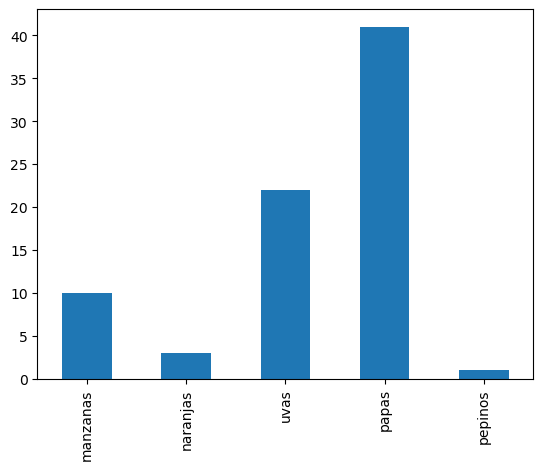

In [28]:
#%matplotlib inline
stock.plot(kind='bar');

Podemos ordenar los datos de acuerdo a los valores en la Serie (y luego graficar para visualizar):

In [29]:
stock.sort_values()  # Ordena de acuerdoa los valores (de menor a mayor)

pepinos      1
naranjas     3
manzanas    10
uvas        22
papas       41
dtype: int64

In [30]:
stock # No modifica stock, devuelve una nueva Serie

manzanas    10
naranjas     3
uvas        22
papas       41
pepinos      1
dtype: int64

In [31]:
stock.sort_index()  # Ordena de acuerdo a los índices, por orden alfabetico

manzanas    10
naranjas     3
papas       41
pepinos      1
uvas        22
dtype: int64

o ordenar los datos de acuerdo al orden alfabético de los índices:

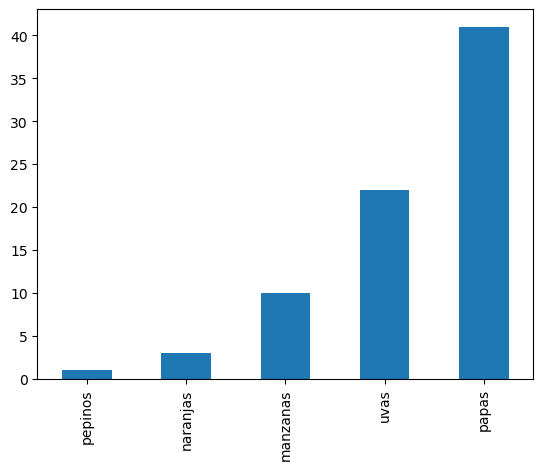

In [32]:
stock.sort_values().plot(kind='bar');

El objeto `Series` contiene varios métodos numericos, incluyendo `mean` (promedio) y `sum` (suma):

In [33]:
stock.sum()

77

In [34]:
stock.mean()

15.4

También se comporta como una secuencia, en el hecho que la función `len` entrega el número de datos en el objeto: 

In [35]:
len(stock)

5

### Uso de la memoria

Para conjuntos de datos más grandes, podría ser importante saber cuántos bytes de memoria requiere guardar la serie. Se puede acceder a esta información con el siguiente comando:

In [36]:
stock.nbytes

40

o sobre el arreglo de valores directamente:

In [37]:
stock.values.nbytes

40

Son 40 bytes porque tenemos 5 elementos guardados como un int64 (cada uno requiere 8 bytes):

In [38]:
stock.dtype

dtype('int64')

El objeto Series requiere memoria adicional. Esta información se puede obrener mediante el comando:

In [39]:
stock.memory_usage()

252

--------
### Ejercicio

Cree una copia de la serie `stock`, llamela `stock2`. Luego agregue dos elementos más con valores a su elección. Calcule el promedio, uso de memoria y haga dos graficos de `stock2`, ordenandolos por cantidades y por índices. 

manzanas      10
naranjas       3
uvas          22
papas         41
pepinos        1
zapatos       50
calcetines    25
dtype: int64

Promedio de stock2: 21.714285714285715
Uso de la memoria de stock2: 112 bytes


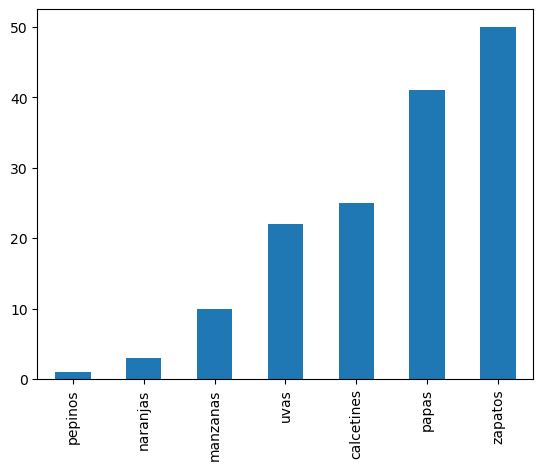

In [51]:
# Escriba aquí su solución

# Hacemos una copia de stock
stock2 = stock.copy()
# Agregamos valores
stock2["zapatos"]  = 50
stock2["calcetines"] = 25

# Imprimimos la serie
print(stock2)

#Calculamos el promedio y uso de memoria
print("\nPromedio de stock2:", stock2.mean())
print("Uso de la memoria de stock2:", stock2.memory_usage(), "bytes")

# Graficamos ordenado por valores
stock2.sort_values().plot(kind="bar");

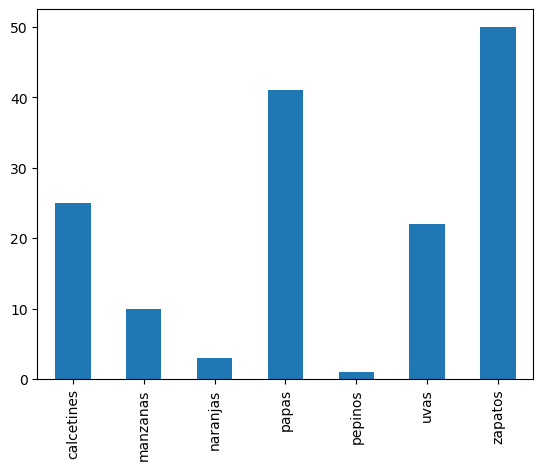

In [52]:
# Graficamos ordenado por índices
stock2.sort_index().plot(kind="bar");

------

### Estadísticas

Se puede obtener ciertos valores descriptivos de los datos de un objeto `Series` usand el comando `describe()`:

In [53]:
stock.describe()

count     5.000000
mean     15.400000
std      16.501515
min       1.000000
25%       3.000000
50%      10.000000
75%      22.000000
max      41.000000
dtype: float64

Como es usual, la documentación (`help(stock.describe)`) provee más información, y además se puede recurrir al sitio web de Pandas (`https://pandas.pydata.org`) para más información.

### Graficando datos

Se puede hacer gráficos de manera muy fácil usando el método `plot()` del objeto Series. Ya vimos antes como hacer un gráfico de barras. El método `Series.plot()` acepta un argumento `kind`, como por ejemplo `kind="bar"`. Está también disponible el método equivalente `Series.plot.bar()`:


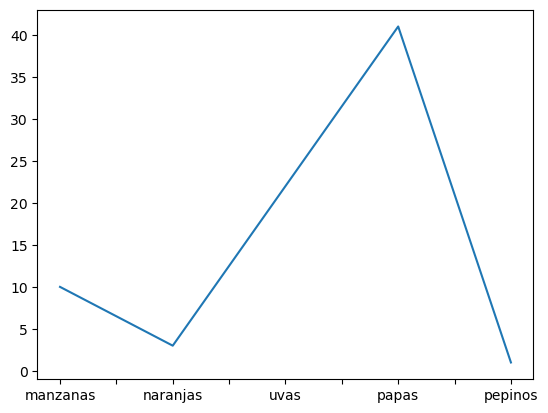

In [54]:
stock.plot();

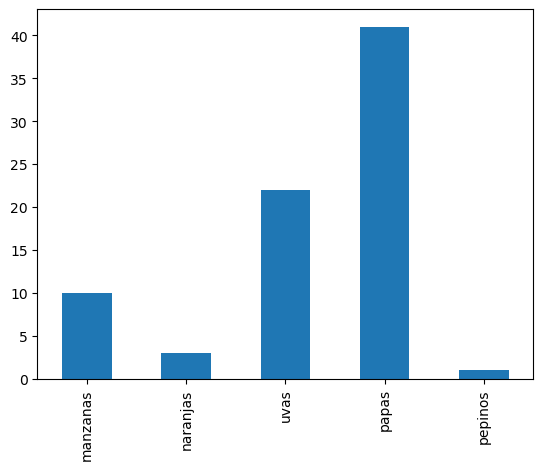

In [55]:
stock.plot(kind="bar");

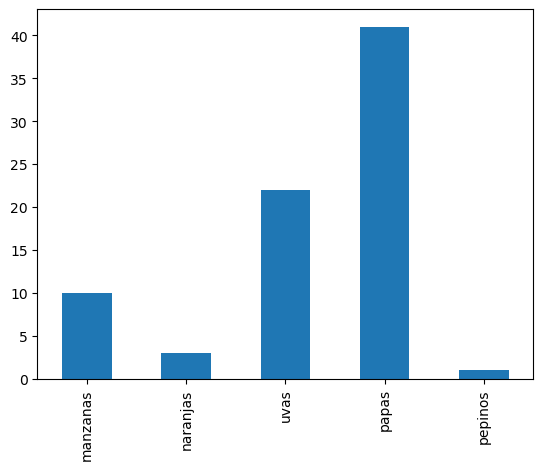

In [56]:
stock.plot.bar();

Otros ejemplos:

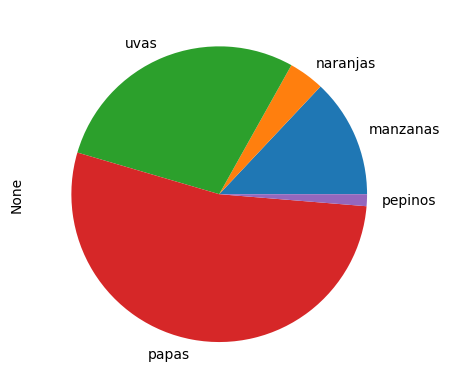

In [57]:
stock.plot.pie();

Para modificar el gráfico, podemos obtener parámetros del objeto y modificarlos: 

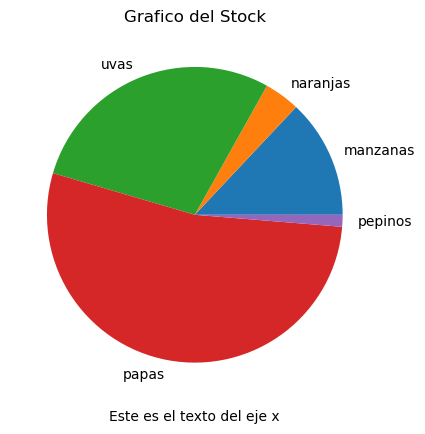

In [58]:
ax = stock.plot.pie()
ax.set_ylabel(None);
ax.set_xlabel("Este es el texto del eje x")
ax.set_title("Grafico del Stock");

Observación: estos gráficos son del tipo que se genera con el módulo `matplotlib.pyplot`.

### Valores faltantes

Los conjuntos de datos "reales" tienden a ser incompletos. Tratar con datos faltantes es un topico importante en ciencias de datos. La convención en Pandas es que el float `NaN`(llamado así por `N`ot `a` `N`umber) representa puntos faltantes en los datos. Por ejemplo, si tenemos una Serie para el stock, pero no sabemos el valor de `manzanas`, podemos reemplazar la cantidad por `NaN`.

En Python, el valor especial `NaN` puede ser creado usando el comando `float('nan')` o usando `numpy.nan` si se importa el módulo numpy,


In [59]:
stock['manzanas'] = float('nan')

In [61]:
stock

manzanas     NaN
naranjas     3.0
uvas        22.0
papas       41.0
pepinos      1.0
dtype: float64

Notar que el valor `dtype` de la Serie `stock` cambió de `int64`a `float64` cuando asignamos `NaN` a `manzanas`: toda la serie se transforma en float, porque `NaN` solo se define como un float. 

(Hay un propósito en crear el objeto `NaN` en Pandas, que explica el por qué se fija la limitación anterior).

Asumamos que necesitamos calcular cuántos items de `stock` tenemos usando la función `sum`: 

In [62]:
stock.values

array([nan,  3., 22., 41.,  1.])

Una situación común es que se tengan datos faltantes en una Serie o DataFrame (veremos qué son más adelante) y que queramos procesar estos datos de todas maneras, tratando a los valores faltantes de un modo especial. 

In [63]:
stock.sum()

67.0

En el ejemplo anterior, `sum` simplemente ignora los valores `NaN` en el total. 

También podemos *limpiar* al objeto Series, removiendo todas las entradas que tengan un valor `NaN`: 

In [64]:
stock.dropna()

naranjas     3.0
uvas        22.0
papas       41.0
pepinos      1.0
dtype: float64

In [65]:
stock

manzanas     NaN
naranjas     3.0
uvas        22.0
papas       41.0
pepinos      1.0
dtype: float64

In [66]:
stock.mean()  # Para calcular el promedio, ignora las filas que son NaN (no las toma como 0)

16.75

In [67]:
stock.dropna().mean()

16.75

In [68]:
stock.sum()/len(stock)  # Aquí divido por 5 (es como si el valor NaN fuese 0)

13.4

### Acceso a los datos en Series: explícito e implícito (`loc` e `iloc`)

In [69]:
stock

manzanas     NaN
naranjas     3.0
uvas        22.0
papas       41.0
pepinos      1.0
dtype: float64

#### Indexando

Podemos acceder a valores individuales a través de sus índices, así como si las Series fuese un diccionario: 

In [72]:
stock['uvas']

22.0

Sin embargo, hay una forma equivalente y recomendada de hacer esta recuperación usando el método `loc` (por LOCation):

In [73]:
stock.loc['uvas']

22.0

Pandas también permite usar índices enteros en las Series. Esto se conoce como *indexación implícita* (implicit indexing), ya que por ejemplo el objeto Series `stock` no usa enteros como índices, sino que los nombres de las frutas y verduras. 

Por ejemplo, podemos recuperar el valor de `uvas` a través del índice implícito 2, porque `uvas` está en la fila 3 del objet `stock` (es decir, aquí también contamos desde cero):

In [74]:
stock[2]  # Esto es lo mismo que decir stock["uvas"]

22.0

En este ejemplo, el comando anterior funciona bien y parece conveniente, pero puede ser muy confuso si es que los índices de los objetos consisten en números enteros. Por esa razon, la forma explícita (y recomendada) de usar este tipo de índices es a través del método `iloc` (ImplicitLOCation): 

In [75]:
stock.iloc[2]  # Se usa únicamente para recuperar el valor en el índice implícito 2

22.0

Mostremos un ejemplo "complicado" que justifica el uso de loc e iloc:

In [76]:
serieComplicada = pd.Series([23,85,100],index = [3,2,1])
serieComplicada

3     23
2     85
1    100
dtype: int64

In [77]:
serieComplicada[2] # ¿Qué debería devolver?

85

Vemos que privilegia el nombre del índice (indexación explícita).. pero puede ser ambiguo...

In [78]:
serieComplicada.loc[2] # Con esto nos aseguramos recuperar el valor de índice 2

85

In [79]:
serieComplicada.iloc[2] 
# Con esto nos aseguramos de recuperar el "tercer" valor (porque cuenta desde 0)

100

#### Cortando

In [80]:
stock

manzanas     NaN
naranjas     3.0
uvas        22.0
papas       41.0
pepinos      1.0
dtype: float64

También podemos cortar la serie: 

In [81]:
stock.loc['naranjas':'papas']

naranjas     3.0
uvas        22.0
papas       41.0
dtype: float64

...incluso saltar de dos en dos: 

In [82]:
stock.loc['manzanas':'pepinos':2]

manzanas     NaN
uvas        22.0
pepinos      1.0
dtype: float64

In [83]:
stock.loc[[True,True,False,False,True]] # Recuperamos las filas con valor True

manzanas    NaN
naranjas    3.0
pepinos     1.0
dtype: float64

In [84]:
stock > 10 # Podemos hacer comparaciones

manzanas    False
naranjas    False
uvas         True
papas        True
pepinos     False
dtype: bool

In [85]:
stock.loc[stock > 10] # Podemos usarlo para cortar una serie

uvas     22.0
papas    41.0
dtype: float64

### Manipulación de datos

Se puede realizar operaciones numericas en las Series para todos los valores al mismo tiempo, del mismo modo que se procesan los arreglos numpy:

In [86]:
stock - stock.mean() # Restamos a cada valor el promedio

manzanas      NaN
naranjas   -13.75
uvas         5.25
papas       24.25
pepinos    -15.75
dtype: float64

In [87]:
import numpy as np
np.sqrt(stock) # Calculamos la raíz cuadrada de cada valor

manzanas         NaN
naranjas    1.732051
uvas        4.690416
papas       6.403124
pepinos     1.000000
dtype: float64

Ademas, Pandas administra de manera inteligente los índices:

In [88]:
serie1 = pd.Series([1,2], index= ["Pedro","Juan"])
print(serie1)
serie2 = pd.Series([100,200], index= ["Juan","Pedro"])
print("")
print(serie2)
serie1+serie2

Pedro    1
Juan     2
dtype: int64

Juan     100
Pedro    200
dtype: int64


Juan     102
Pedro    201
dtype: int64

Incluso cuando hay datos faltantes:

In [89]:
serie3 = pd.Series([10,20,50], index = ["Pedro","Juan","Miguel"])
print(serie3)
serie2+serie3

Pedro     10
Juan      20
Miguel    50
dtype: int64


Juan      120.0
Miguel      NaN
Pedro     210.0
dtype: float64

------
### Ejercicios

1. Escriba una función `operacion` que reciba dos series `serie1` y `serie2` y que devuelva una serie con los máximos 3 promedios de los elementos que tengan en común cada serie. 

Por ejemplo, si `serie1` es:
```
a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64
```
y `serie2` es:

```
b    2
d   -1
a    7
u    4
e    1
dtype: int64
```

entonces la salida de la función `operacion` es:

```
b    2.0
e    3.0
a    4.0
dtype: float64
```

In [96]:
# Escriba aquí su solución

def operacion(serie1, serie2):
    # Hago una serie con los promedios de los valores en ambas series
    serie3 = (1/2) * (serie1 + serie2)
    # Borro los NaN y ordeno los valores de menor a mayor, guardando los últimos 3 valores
    serie3 = serie3.dropna().sort_values().iloc[-3:]
    return serie3

serie1 = pd.Series([1,2,3,4,5,6],index = ["a","b","c","d","e","f"])
serie2 = pd.Series([2,-1,7,4,1],index = ["b","d","a","u","e"])

operacion(serie1,serie2)

b    2.0
e    3.0
a    4.0
dtype: float64

2. Escriba una función `cuentaChar` que recibe como argumento una serie de strings `serie`, y devuelva una serie con la cantidad de caracteres de cada elemento de `serie`. 

**HINT**: use herramientas de programación funcional

In [108]:
# Escriba aquí su solución 

def cuentaChar(serie):
    # Recuperamos los valores (o sea los strings)
    strings = serie.values
    # Creamos una lista vacía para guardar los largos de los strings
    largos = []
    # Recorremos la lista de valores y agregamos a la lista los largos de los strings
    for s in strings:
        largos.append(len(s))
    # Creamos la serie de salida
    serieOut = pd.Series(largos, index = serie.index)
    return serieOut

# Creamos una serie de ejemplo
serieEjemplo = pd.Series(["hola","como","estas","tu"],index = ["palabra1", "palabra2", "palabra3", "palabra4"])
print(serieEjemplo)

# Corremos la función en el ejemplo
cuentaChar(serieEjemplo)

palabra1     hola
palabra2     como
palabra3    estas
palabra4       tu
dtype: object


palabra1    4
palabra2    4
palabra3    5
palabra4    2
dtype: int64

-----

## Data Frame

### Ejemplo del Stock - `DataFrame`

Luego de introducir el objeto `Series`, nos vamos a enfocar en el segundo tipo de datos importante en Pandas: los `DataFrame`. 

Como primera descripción, podríamos decir que un `DataFrame` es similar a una planilla de cálculo: contiene filas y columnas. 

Las Series son un caso especiales de los Data Frames, en los cuales solo hay una columna. 

Continuemos con el ejemplo del stock:

In [109]:
stock

manzanas     NaN
naranjas     3.0
uvas        22.0
papas       41.0
pepinos      1.0
dtype: float64

Supongamos que además de llevar la cuenta de cuántos objetos de cada tipo tenemos en stock, tenemos otra Serie con los precios por unidad a los que se vende cada item:

In [110]:
precio = pd.Series({'manzanas': 0.55, 'uvas': 0.50, 'pepinos' : 0.99, 'papas' : 0.17, 'naranjas': 1.76})
precio

manzanas    0.55
uvas        0.50
pepinos     0.99
papas       0.17
naranjas    1.76
dtype: float64

El objeto `DataFrame` nos permite trabajar con las dos series juntas. De hecho, una forma conveniente de crear un objeto `DataFrame` es combinando un cierto número de series como lo hacemos a continuación:

In [115]:
shop = pd.DataFrame()   # Creamos un DataFrame vacío
shop["Stock"] = stock # Creamos la columna titulada "Stock" con los datos de la variable stock
shop

,Stock
manzanas,NaN
naranjas,3.0
uvas,22.0
papas,41.0
pepinos,1.0


In [116]:
shop["Precio"] = precio # Creamos la columna titulada "Precio" con los datos de la variable precio
shop

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
uvas,22.0,0.50
papas,41.0,0.17
pepinos,1.0,0.99


Dado que ambas series tenían los mismos índices, nuestros datos se alinearon automáticamente en `DataFrame` de nombre `shop`, aún cuando los datos estaban almacenados en distinto orden en `precio` y `stock`.


Hay una forma abreviada de construir el dataframe anterior, usando diccionarios:

In [117]:
shop = pd.DataFrame({'Stock' : stock, 'Precio' : precio})
shop

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17
pepinos,1.0,0.99
uvas,22.0,0.50


Si a una de la series le falta un dato, Pandas va a insertar un `NaN` en los campos correspondientes:

In [118]:
precio2 = precio.copy()

In [119]:
precio2['plátanos'] = 1.99
precio2

manzanas    0.55
uvas        0.50
pepinos     0.99
papas       0.17
naranjas    1.76
plátanos    1.99
dtype: float64

In [120]:
shop3 = pd.DataFrame({'stock' : stock, 'price' : precio2})
shop3

,stock,price
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17
pepinos,1.0,0.99
plátanos,NaN,1.99
uvas,22.0,0.50


In [121]:
shop3['stock']['plátanos']=1
shop3

,stock,price
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17
pepinos,1.0,0.99
plátanos,1.0,1.99
uvas,22.0,0.50


### Accediendo a los datos en un `DataFrame`

In [123]:
shop

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17
pepinos,1.0,0.99
uvas,22.0,0.50


Cada fila de un data frame tiene un índice, que es el mismo para todas las columnas, y que se muestra en negritas en la primera columna. También podemos acceder a los índices con el comando:

In [124]:
shop.index

Index(['manzanas', 'naranjas', 'papas', 'pepinos', 'uvas'], dtype='object')

In [125]:
shop.columns

Index(['Stock', 'Precio'], dtype='object')

In [126]:
type(shop.columns)

pandas.core.indexes.base.Index

In [134]:
df = pd.DataFrame([[1,1],[0,0]],index=["gatos","perros"],columns=["Stock","Precio"])
df

,Stock,Precio
gatos,1,1
perros,0,0


Podemos juntar los dos dataframes con el comando `concat`.

In [133]:
pd.concat([shop,df])

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17
pepinos,1.0,0.99
uvas,22.0,0.50
gatos,1.0,1.00
perros,0.0,0.00


### Extrayendo columnas
Usando los nombres de las columnas, podemos extraer una columna como un objeto `Series` usando el operador (`[]`):

In [135]:
shop['Stock']

manzanas     NaN
naranjas     3.0
papas       41.0
pepinos      1.0
uvas        22.0
Name: Stock, dtype: float64

In [136]:
shop['Precio']

manzanas    0.55
naranjas    1.76
papas       0.17
pepinos     0.99
uvas        0.50
Name: Precio, dtype: float64

In [137]:
type(shop['Precio'])

pandas.core.series.Series


### Extrayendo filas

Tenemos dos opciones para extraer una fila de datos. 

Primero, a través del indexado explícito utilizando la etiqueta de la fila:

In [138]:
shop

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17
pepinos,1.0,0.99
uvas,22.0,0.50


In [139]:
shop.loc['naranjas']             # una fila se devuelve como una Serie

Stock     3.00
Precio    1.76
Name: naranjas, dtype: float64

In [140]:
type(shop.loc["naranjas"])

pandas.core.series.Series

In [141]:
shop.loc['manzanas':'papas']  # se devuelven varias filas como un DataFrame

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17


Segundo, podemos usar indexado implícito (como hicimos con las series):

In [142]:
shop.iloc[0,:]  # Tomo la primera fila, y todas las columnas

Stock      NaN
Precio    0.55
Name: manzanas, dtype: float64

In [143]:
shop.iloc[:,1] # Tomo todas las filas de la segunda columna

manzanas    0.55
naranjas    1.76
papas       0.17
pepinos     0.99
uvas        0.50
Name: Precio, dtype: float64

In [144]:
shop.iloc[0:3] # Tomo las filas entre la primera y la tercera

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17


#### Advertencia

Notemos que hay algunas inconsistencias aquí: el corte explícito con etiquetas (como `shop.loc['manzanas':'papas']`) incluye a `papas`, mientras que en el corte implícito (como `shop.iloc[0:3]`) la fila con índice `3` no se incluye. 

El comportamiento de `.loc` es conveniente y una buena elección cuando se usan etiquetas como strings, como en nuestro ejemplo `stock`. El comportamiento de `.iloc` refleja el normal comportamiento de Python. 

### Manipulación de datos

La verdadera fortaleza de los data frames es que podemos continuar procesando los datos de manera muy cómoda.

Por ejemplo, podemos calcular el valor de los productos que tenemos en stock, y agregar esto como una nueva columna:

In [145]:
shop

,Stock,Precio
manzanas,NaN,0.55
naranjas,3.0,1.76
papas,41.0,0.17
pepinos,1.0,0.99
uvas,22.0,0.50


In [156]:
shop['Valor'] = shop['Precio'] * shop['Stock']
shop

,Stock,Precio,Valor
manzanas,NaN,0.55,NaN
naranjas,3.0,1.76,5.28
papas,41.0,0.17,6.97
pepinos,1.0,0.99,0.99
uvas,22.0,0.50,11.00


Podemos entonces calcular la suma para, por ejemplo, estimar el valor total de lo que hay en stock:

In [147]:
shop['Valor'].sum()

24.240000000000002

Aprocechemos este ejemplo para mostrar como podemos cortar columnas usando el método `.loc`:

In [148]:
shop.loc[:,"Precio":"Valor"]

,Precio,Valor
manzanas,0.55,NaN
naranjas,1.76,5.28
papas,0.17,6.97
pepinos,0.99,0.99
uvas,0.50,11.00


...o `.iloc`:

In [149]:
shop.iloc[:,1:3]

,Precio,Valor
manzanas,0.55,NaN
naranjas,1.76,5.28
papas,0.17,6.97
pepinos,0.99,0.99
uvas,0.50,11.00


In [150]:
shop.iloc[:,[2,1,2]]

,Valor,Precio,Valor
manzanas,NaN,0.55,NaN
naranjas,5.28,1.76,5.28
papas,6.97,0.17,6.97
pepinos,0.99,0.99,0.99
uvas,11.00,0.50,11.00


In [151]:
shop.iloc[1:4,[2,1,2]]

,Valor,Precio,Valor
naranjas,5.28,1.76,5.28
papas,6.97,0.17,6.97
pepinos,0.99,0.99,0.99


In [152]:
shop.iloc[[1,2,2],[2,1,2]]

,Valor,Precio,Valor
naranjas,5.28,1.76,5.28
papas,6.97,0.17,6.97
papas,6.97,0.17,6.97


In [153]:
shop.iloc[:,[True,False,True]]

,Stock,Valor
manzanas,NaN,NaN
naranjas,3.0,5.28
papas,41.0,6.97
pepinos,1.0,0.99
uvas,22.0,11.00


Si por alguna razón quisieramos cambiar las filas y las columnas, podemos usar el metodo `.transpose()`:

In [154]:
shop.transpose()

,manzanas,naranjas,papas,pepinos,uvas
Stock,NaN,3.00,41.00,1.00,22.0
Precio,0.55,1.76,0.17,0.99,0.5
Valor,NaN,5.28,6.97,0.99,11.0


# Ejemplo/Ejercicio: Población europea en 2017

Aquí hay un segundo ejemplo para demostrar algunos casos de uso de los `DataFrames` de Pandas.

Primero, obtenemos los datos. Los obtendremos del repositorio de Hans Fangohr, el cual los obtuvo originalmente de EUROSTAT (reference "demo_gind")

In [ ]:
# macOS
!curl https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv -o eu-pop-2017.csv

In [157]:
# Windows
import urllib.request
url = 'https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv'
filename = 'eu-pop-2017.csv'
urllib.request.urlretrieve(url, filename)

('eu-pop-2017.csv', <http.client.HTTPMessage at 0x7ff648127a90>)

In [ ]:
# Linux
#!wget https://fangohr.github.io/data/eurostat/population2017/eu-pop-2017.csv

La fuente de datos es un CSV (comma-separated-value file):

Pandas tiene un soporte muy completo para leer archivos de diferentes formatos, incluyendo MS Excel, CSV, HDF5 y otros.  Cada rutina de lectura tiene sus propias opciones, para adaptar el proceso de distintas maneras. 

In [158]:
df = pd.read_csv('eu-pop-2017.csv')

In [163]:
df

,geo,pop17,pop18,births,deaths
0,Belgium,11351727,11413058,119690,109666
1,Bulgaria,7101859,7050034,63955,109791
2,Czechia,10578820,10610055,114405,111443
3,Denmark,5748769,5781190,61397,53261
4,Germany,82521653,82850000,785000,933000
5,Estonia,1315634,1319133,13784,15543
6,Ireland,4784383,4838259,62084,30324
7,Greece,10768193,10738868,88523,124530
8,Spain,46527039,46659302,390024,421269
9,France,66989083,67221943,767691,603141


Podemos usar el comando 'head()' para solo mostrar las primeras 5 líneas de los datos, pero le pueden colocar un entero $n$ para ver las primeras $n$ filas:

In [161]:
df.head()

,geo,pop17,pop18,births,deaths
0,Belgium,11351727,11413058,119690,109666
1,Bulgaria,7101859,7050034,63955,109791
2,Czechia,10578820,10610055,114405,111443
3,Denmark,5748769,5781190,61397,53261
4,Germany,82521653,82850000,785000,933000


Para conocer el significado de las columnas, tenemos que obtener la *metadata*. En este caso, tenemos la siguiente descripción de los datos:

- **geo**: nombre del país en cuestión
- **pop17**: la población del país el 1 de enero de 2017
- **pop18**: la población del país el 1 de enero de 2018
- **births**: el número de nacimientos (vivos) en el país durante el año 2017
- **deaths**: el número de fallecidos en el país durante 2017

Los datos son provistos para todos los 28 países de la Union Europea (en 2017).

Primero, queremos usar el nombre del país como índice. Podemos hacer esto con el comando:

In [164]:
df2 = df.set_index('geo')

In [167]:
df2.index

Index(['Belgium ', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia ',
       'Ireland', 'Greece', 'Spain', 'France ', 'Croatia', 'Italy', 'Cyprus',
       'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'United Kingdom'],
      dtype='object', name='geo')

In [170]:
df2

,pop17,pop18,births,deaths
geo,,,,
Belgium,11351727,11413058,119690,109666
Bulgaria,7101859,7050034,63955,109791
Czechia,10578820,10610055,114405,111443
Denmark,5748769,5781190,61397,53261
Germany,82521653,82850000,785000,933000
Estonia,1315634,1319133,13784,15543
Ireland,4784383,4838259,62084,30324
Greece,10768193,10738868,88523,124530
Spain,46527039,46659302,390024,421269


Observar que no podemos cambiar los índices de un DataFrame dado, por lo que el método `set_index()` devuelve un nuevo DataFrame (esto ocurre para muchas otras operaciones).

Como alternativa, podemos también agregar un argumento a la función `read_csv` para indicar cuál columna queremos que se use como índice:

In [171]:
df = pd.read_csv('eu-pop-2017.csv', index_col="geo")

In [172]:
df.head()

,pop17,pop18,births,deaths
geo,,,,
Belgium,11351727,11413058,119690,109666
Bulgaria,7101859,7050034,63955,109791
Czechia,10578820,10610055,114405,111443
Denmark,5748769,5781190,61397,53261
Germany,82521653,82850000,785000,933000


Exploramos los datos graficando parte de ella:

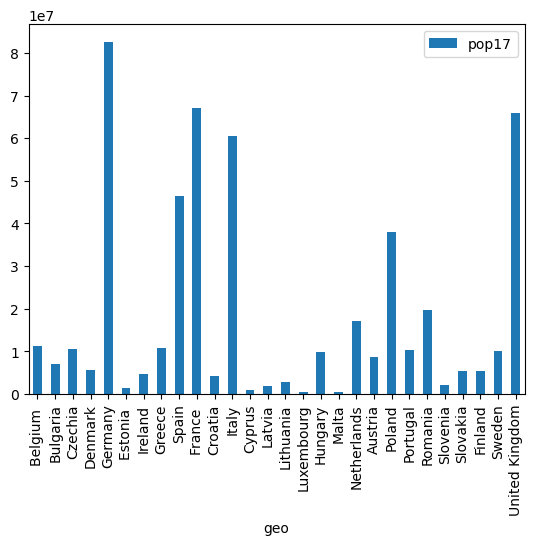

In [173]:
df.plot(kind='bar', y=['pop17']);

El gráfico anterior muestra la población que había el 1 de enero de 2017 en cada país. 

Vamos a mejorar esta visualización de dos maneras:

- Queremos contar la población en millones. Podemos hacer esto dividiendo todos los datos por $10^6$. 
- Sería interesante ordernar los países por orden de tamaño.


In [174]:
df.head()

,pop17,pop18,births,deaths
geo,,,,
Belgium,11351727,11413058,119690,109666
Bulgaria,7101859,7050034,63955,109791
Czechia,10578820,10610055,114405,111443
Denmark,5748769,5781190,61397,53261
Germany,82521653,82850000,785000,933000


In [175]:
df_millones = df / 1e6
df_millones.head()

,pop17,pop18,births,deaths
geo,,,,
Belgium,11.351727,11.413058,0.119690,0.109666
Bulgaria,7.101859,7.050034,0.063955,0.109791
Czechia,10.578820,10.610055,0.114405,0.111443
Denmark,5.748769,5.781190,0.061397,0.053261
Germany,82.521653,82.850000,0.785000,0.933000


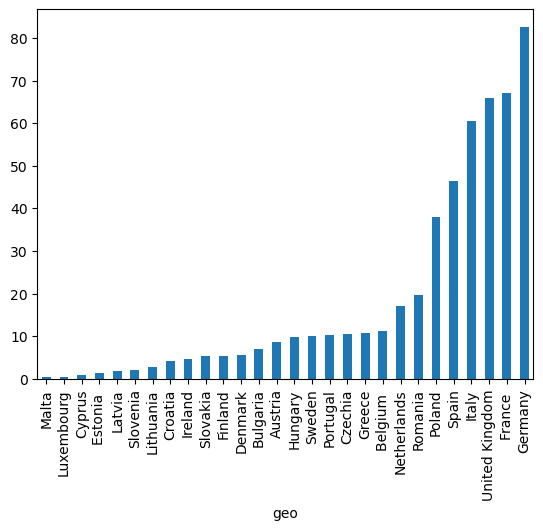

In [177]:
df_millones['pop17'].sort_values().plot(kind='bar');

El ejemplo anterior selecciona una columna del data frame (`['pop17']`), que se entrega como un objeto `Series`. Entonces, podemos ordenar este objeto usando el método `sort_values()` de acuerdo a los valores. Finalmente hacemos el gráfico. 

De manera alternativa, podemos también crear un gráfico con todo el data frame, pero decir que `pop17` es la columna para ordenar, y que queremos solo la columna de índice `pop17`:


<AxesSubplot:xlabel='geo'>

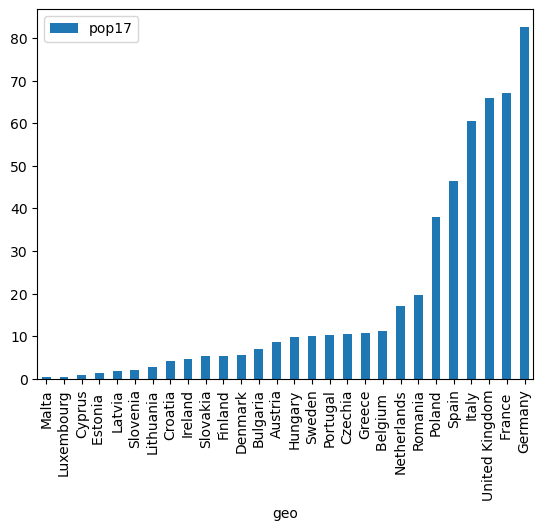

In [178]:
df_millones.sort_values(by='pop17').plot(kind='bar', y='pop17')

<AxesSubplot:xlabel='geo'>

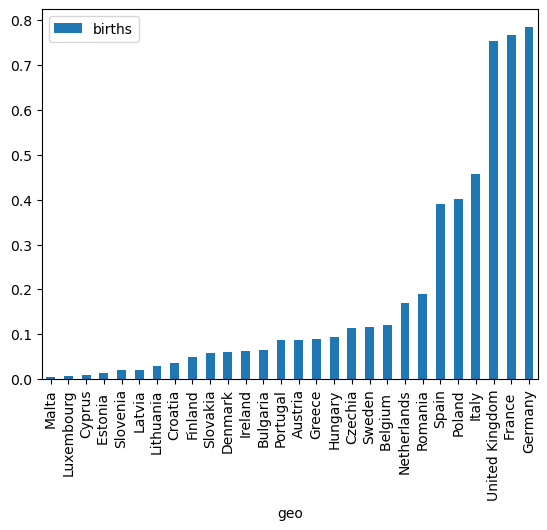

In [179]:
df_millones.sort_values(by='births').plot(kind='bar', y='births')

<AxesSubplot:xlabel='geo'>

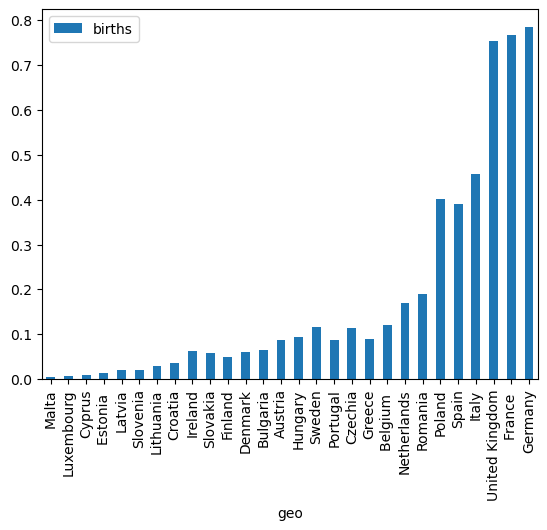

In [180]:
# Ordenamos por población, pero graficamos los nacimientos en 2017
df_millones.sort_values(by='pop17').plot(kind='bar', y='births')

De este modo es fácil graficar más de una columna a la vez:

<AxesSubplot:xlabel='geo'>

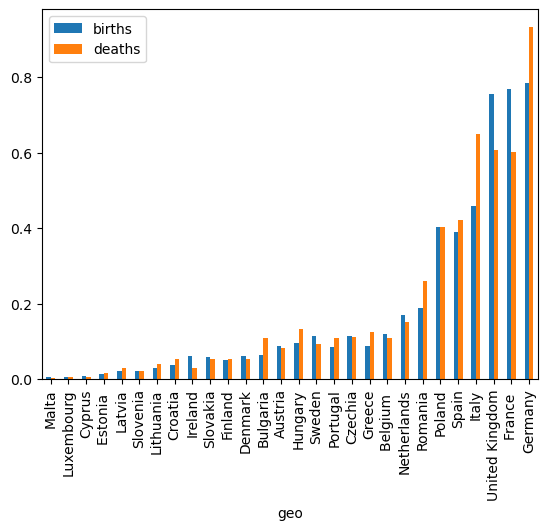

In [181]:
# Ordenamos por población, pero graficamos los nacimientos en 2017
df_millones.sort_values(by='pop17').plot(kind='bar', y=['births','deaths'])

También podemos mejorar el gráfico con los comandos de la librería `matplotlib`:

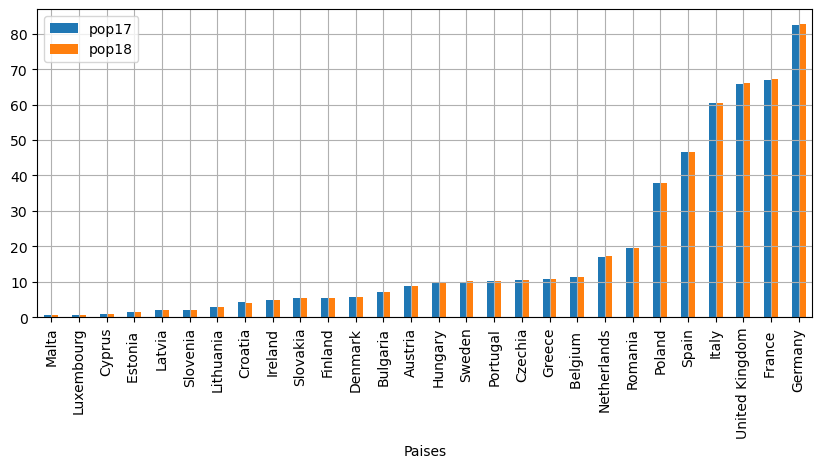

In [182]:
# figsize indica el tamaño del gráfico
ax = df_millones.sort_values(by='pop17').plot(kind='bar', y=['pop17','pop18'], figsize=(10, 4))

#ax.set_ylabel("Población en 2017 y 2018 [en millones]")
ax.set_ylabel(None)
ax.grid()
ax.set_xlabel("Paises");  

------------------------

### Ejercicio:

Haga un gráfico con los nacimientos y muertes en 2017 solo con España, Italia, Alemania y Polonia. El gráfico debe estar ordenado por número de nacimientos en 2017.

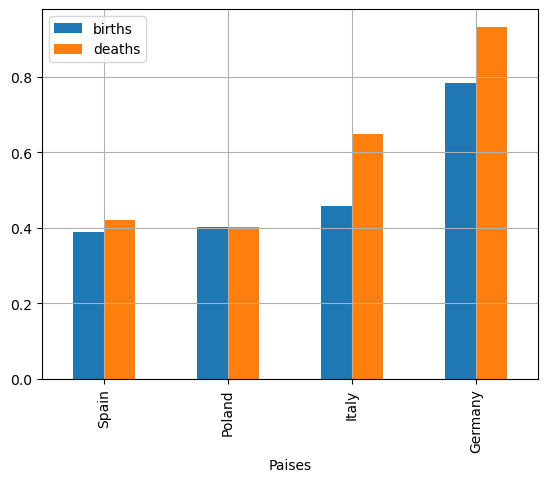

In [189]:
# Escriba aquí su solución

ax = df_millones.loc[["Spain","Italy","Germany","Poland"],:].sort_values(by = "births").plot.bar(y=["births","deaths"]);
ax.grid()
ax.set_xlabel("Paises");  

Basados en el número de nacimientos y muertes, podemos calcular el cambio en la población en 2017. Esta cantidad es llamada el "crecimiento natural" o "natural change":

In [191]:
# Escriba aquí su solución

df_millones["natural change"] = df_millones["births"] - df_millones["deaths"]
df_millones

,pop17,pop18,births,deaths,natural change
geo,,,,,
Belgium,11.351727,11.413058,0.119690,0.109666,0.010024
Bulgaria,7.101859,7.050034,0.063955,0.109791,-0.045836
Czechia,10.578820,10.610055,0.114405,0.111443,0.002962
Denmark,5.748769,5.781190,0.061397,0.053261,0.008136
Germany,82.521653,82.850000,0.785000,0.933000,-0.148000
Estonia,1.315634,1.319133,0.013784,0.015543,-0.001759
Ireland,4.784383,4.838259,0.062084,0.030324,0.031760
Greece,10.768193,10.738868,0.088523,0.124530,-0.036007
Spain,46.527039,46.659302,0.390024,0.421269,-0.031245


De aquí podemos ver que el cambio en la población debido a nacimientos y muertes en Italia y Alemania es el más decreciente en términos absolutos.

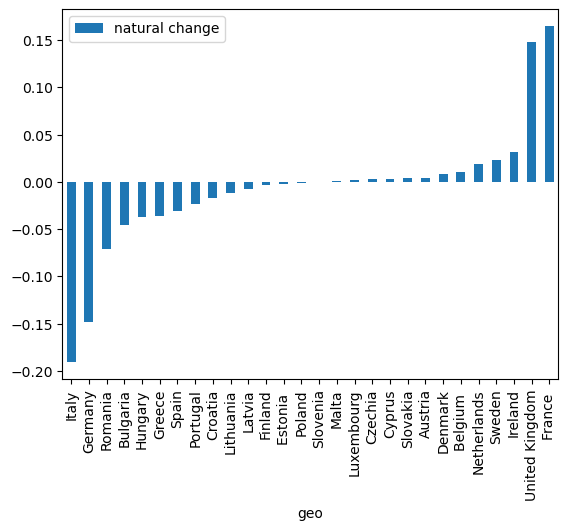

In [193]:
# Escriba aquí su solución

df_millones.sort_values(by = "natural change").plot.bar(y="natural change");

-------
### Ejercicio

Para relacionar el crecimiento natural de la población, a menudo se utiliza la tasa por año y por 1000 habitantes en el país. Por ejemplo la tasa de natalidad por cada 1000 habitantes (https://en.wikipedia.org/wiki/Birth_rate).

1. Escriba un programa que agregue al DataFrame anteriormente creado las columnas `birth-rate`, `death-rate` y `natural-change-rate`. 

In [201]:
# Escriba aquí su solución
# Hacemos una copia de df_millones
df = df_millones.copy()
# Calculamos las tasas de nacimiento, muertes y cambio natural por 1000 habitantes
df["birth-rate"] = 1000 * df["births"] / df["pop17"]
df["death-rate"] = 1000 * df["deaths"] / df["pop17"]
df["natural-change-rate"] = 1000 * df["natural change"] / df["pop17"]
# Revisamos el resultado
df.head()

,pop17,pop18,births,deaths,natural change,birth-rate,death-rate,natural-change-rate
geo,,,,,,,,
Belgium,11.351727,11.413058,0.119690,0.109666,0.010024,10.543770,9.660733,0.883037
Bulgaria,7.101859,7.050034,0.063955,0.109791,-0.045836,9.005389,15.459473,-6.454085
Czechia,10.578820,10.610055,0.114405,0.111443,0.002962,10.814533,10.534540,0.279993
Denmark,5.748769,5.781190,0.061397,0.053261,0.008136,10.680026,9.264766,1.415260
Germany,82.521653,82.850000,0.785000,0.933000,-0.148000,9.512655,11.306123,-1.793469


2. Haga un gráfico de la tasa de crecimiento natural por país (`natural-change-rate`) ordenando los valores de menor a mayor.  

<AxesSubplot:xlabel='geo'>

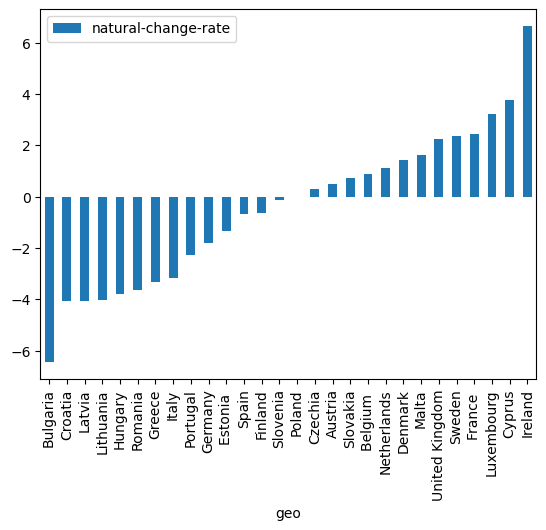

In [202]:
# Escriba aquí su solución

df.sort_values(by = "natural-change-rate").plot.bar(y = "natural-change-rate")

3. Haga un gráfico que muestre la tasa de natalidad y la tasa de mortalidad (en el mismo gráfico) de cada país, ordenando los países por tasa de crecimiento natural. 

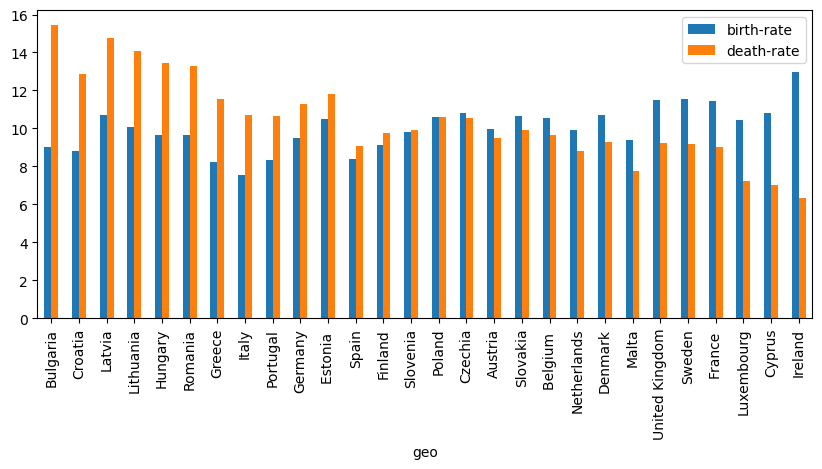

In [207]:
# Escriba aquí su solución

ax = df.sort_values(by = "natural-change-rate").plot.bar(y = ["birth-rate","death-rate"], figsize = (10,4));


4. Calcule ahora una nueva columna del DataFrame anterior llamada `change`, en la que se almacene la diferencia absoluta de población que había entre el 1 de enero de 2018 con respecto al 1 de enero de 2017. Grafique esos datos por país ordenandolos de menor a mayor.

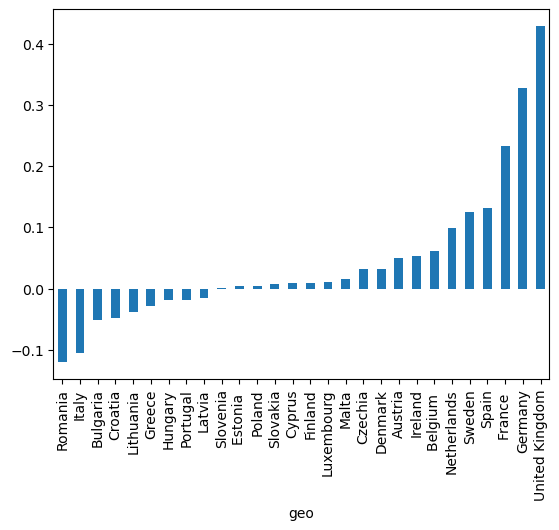

In [210]:
# Escriba aquí su solución

df["chage"] = df["pop18"] - df["pop17"]
df["chage"].sort_values().plot.bar();

5. Use la información anteriormente calculada para estimar la migración de cada País (`change` - `natural-change`). Grafique en una misma figura los datos de migración y crecimeinto natural por país, ordenandolos por cambio total de menor a mayor. 

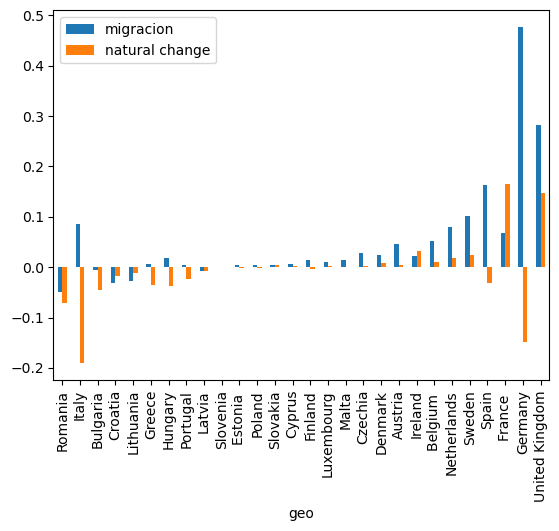

In [216]:
# Escriba aquí su solución

df["migracion"] = df["chage"] - df["natural change"]
df.sort_values(by = "chage").plot.bar(y = ["migracion", "natural change"]);

-----------

### Exportar datos

Pandas contiene métodos para exportar sus objetos ( `Series` y `DataFrame`) a distintos formatos. Por ejemplo, podemos esribir nuestra Serie `stock` en un csv con el siguiente comando:

In [221]:
stock.to_csv('stock.csv', header=False)

In [222]:
!cat stock.csv

manzanas,
naranjas,3.0
uvas,22.0
papas,41.0
pepinos,1.0


In [223]:
df.to_csv('df.csv')

In [224]:
!cat df.csv

geo,pop17,pop18,births,deaths,natural change,birth-rate,death-rate,natural-change-rate,chage,migracion
Belgium ,11.351727,11.413058,0.11969,0.109666,0.010024000000000005,10.543770124140583,9.660732679705916,0.8830374444346666,0.061330999999999136,0.05130699999999913
Bulgaria,7.101859,7.050034,0.063955,0.109791,-0.045836,9.005388589100402,15.459473357609605,-6.454084768509203,-0.05182500000000001,-0.005989000000000008
Czechia,10.57882,10.610055,0.114405,0.111443,0.0029620000000000063,10.814533189902088,10.534539769085777,0.2799934208163109,0.03123499999999879,0.028272999999998785
Denmark,5.748769,5.78119,0.061397,0.053261,0.008135999999999997,10.680025584607765,9.264766074267378,1.415259510340387,0.03242099999999937,0.02428499999999937
Germany,82.521653,82.85,0.785,0.933,-0.14800000000000002,9.512654818002737,11.306123497065673,-1.7934686790629366,0.3283469999999937,0.47634699999999375
Estonia ,1.315634,1.319133,0.013784,0.015543,-0.0017590000000000001,10.477077971533117,11.814075951214

También podemos crear una representación $\LaTeX$ de una tabla:

In [227]:
stock.to_latex()

/var/folders/9g/j4nc58_s5_9cfzq4lmx_blbr0000gn/T/ipykernel_68713/631960211.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  stock.to_latex()


'\\begin{tabular}{lr}\n\\toprule\n{} &     0 \\\\\n\\midrule\nmanzanas &   NaN \\\\\nnaranjas &   3.0 \\\\\nuvas     &  22.0 \\\\\npapas    &  41.0 \\\\\npepinos  &   1.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Más información

Hay mucho más que podemos decir sobre Pandas. Los siguientes recursos poueden ser útiles, pero hay inumerables otras fuentes disponibles:

- Mas información sobre `[]`, `.loc[]` y `.iloc[]` en forma de [Jupyter Notebook]( https://github.com/tdpetrou/Learn-Pandas/blob/master/Learn-Pandas/Selecting%20Subsets/01%20Selecting%20Subsets%20with%20%5B%20%5D%2C%20.loc%20and%20.iloc.ipynb) y [publicación en blog](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c).

- Jake VanderPlas: Python Data Science Handbook [online](https://jakevdp.github.io/PythonDataScienceHandbook/)